In [67]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd

In [39]:
# 计算 position embedding， 还区分了 sin part 和 cos part
pos = 1
d_model = 512
x_s, x_c, x = [], [], []
for j in range(0, 256):
    s = math.sin((pos/math.pow(10000, 2*j/d_model)))
    c = math.cos((pos/math.pow(10000, 2*j/d_model)))
    x_s.extend([s])
    x_c.extend([c])
    x.extend([s,c])

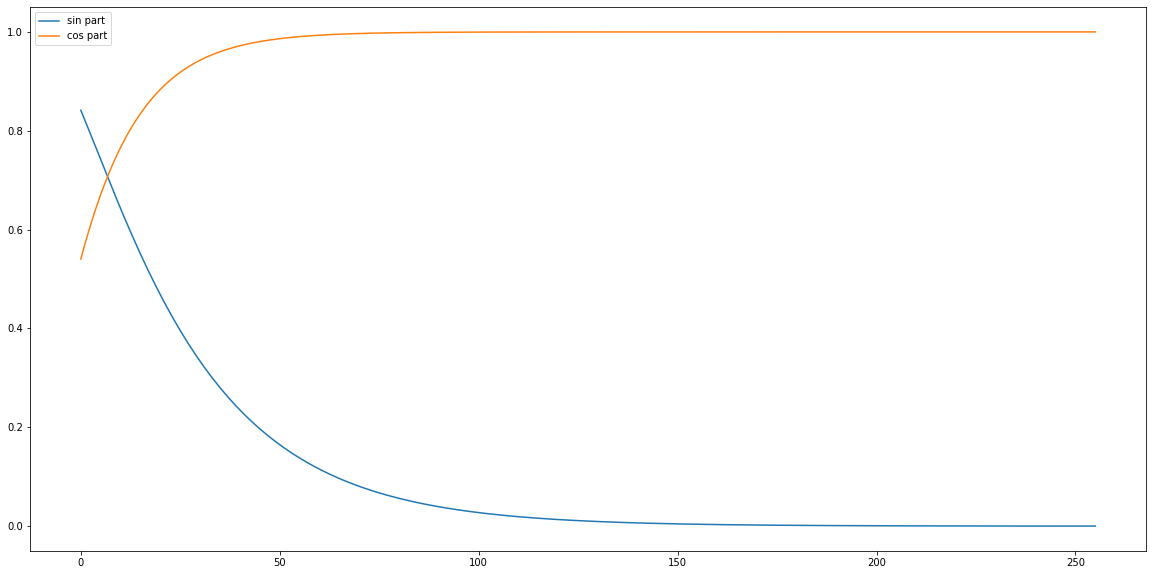

In [49]:
# 单个 position 向量
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_s, label='sin part')
ax.plot(x_c, label='cos part')
ax.legend()

In [50]:
total_x = []
for pos in range(0,512):
    pos = pos
    d_model = 512
    x_s, x_c, x = [], [], []
    for j in range(0, 256):
        s = math.sin((pos/math.pow(10000, 2*j/d_model)))
        c = math.cos((pos/math.pow(10000, 2*j/d_model)))
        x_s.extend([s])
        x_c.extend([c])
        x.extend([s,c])
    total_x.append([x_s, x_c, x])
    

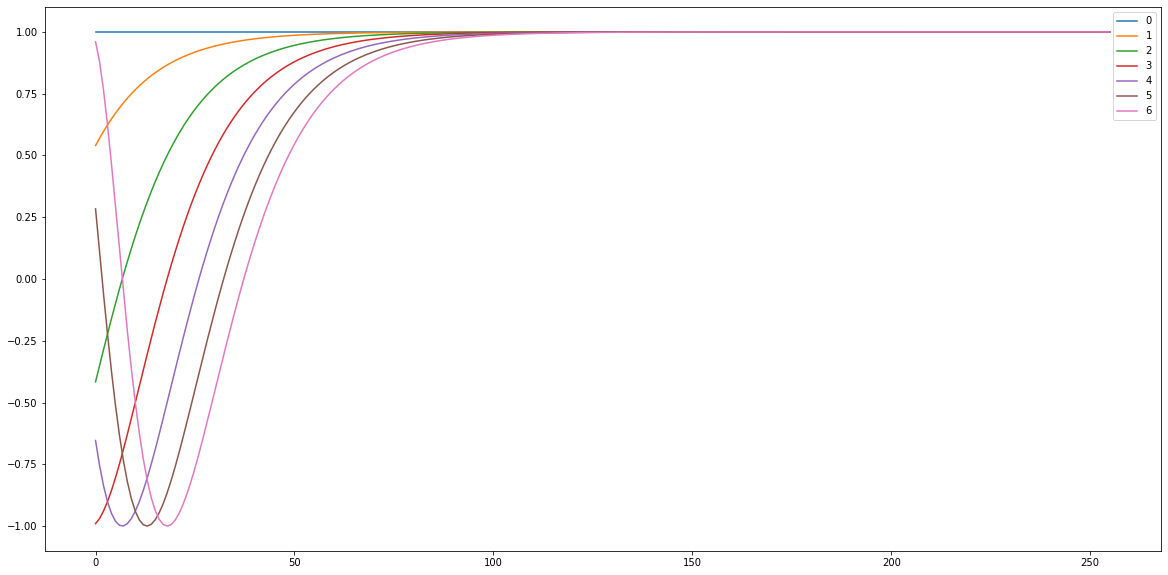

In [61]:
# postion embedding 各个 row 的曲线汇总 
fig, ax = plt.subplots(figsize=(20,10))
for idx, t in enumerate(total_x):
    ax.plot(t[1], label=idx)  # 调整画的部分， 0: sin part
    if idx >5:
        break
ax.legend()

1. 你会发现不同 position token 的顶点，是慢慢移动的 (sin part)
2. 同理 cos part 也是不断移动的

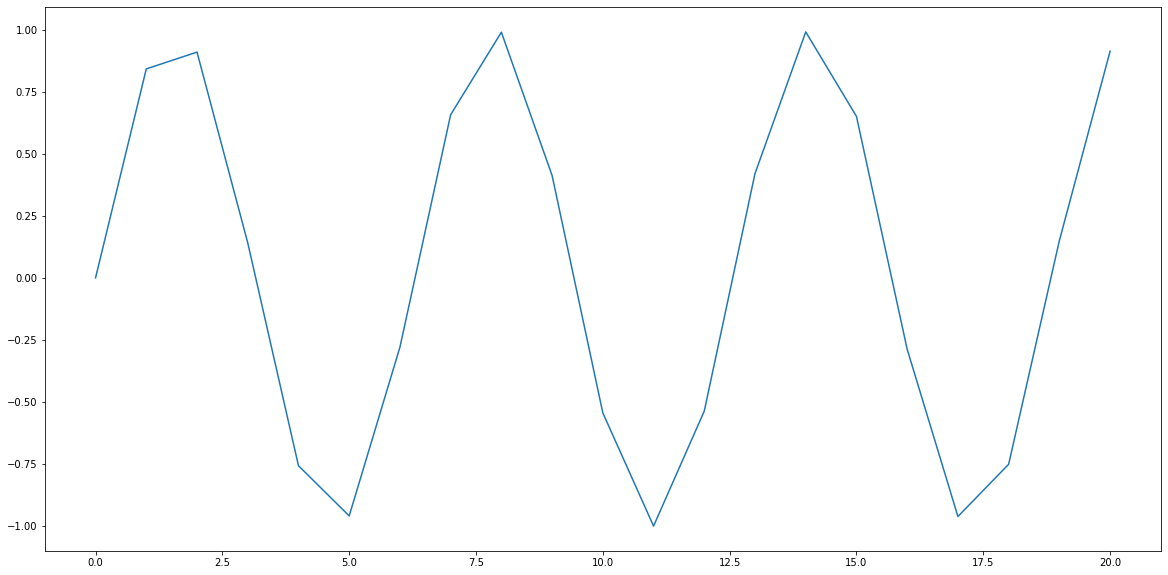

In [56]:
# position embedding 第一列
x = []
for idx, t in enumerate(total_x):
    x.append(t[0][0])
    if idx >= 20:
        break

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x)

(512, 256)


<AxesSubplot: >

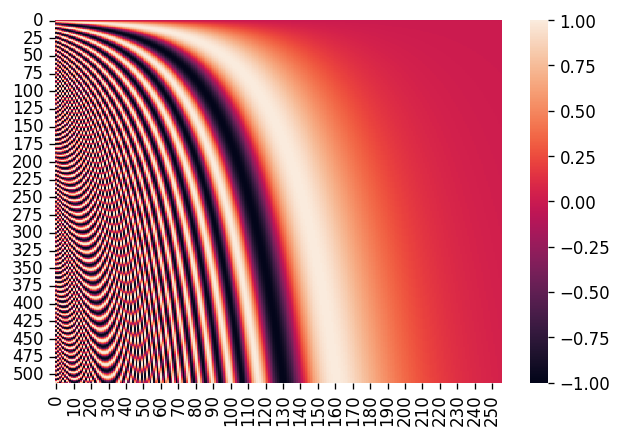

In [85]:
position_emb = []
for t in total_x:
    position_emb.append(t[0])
position_emb = np.array(position_emb)
print(position_emb.shape)

plt.figure(dpi=120)
sns.heatmap(data=position_emb)